In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import cv2

In [6]:
import imghdr

In [7]:
data_dir='data'

In [8]:
os.listdir(data_dir)

['happy', 'sad']

In [9]:
image_exts = [ 'jpeg','jpg' ,'bmp' ,'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
             img = cv2.imread(image_path)
             tip = imghdr.what(image_path)
             if tip not in image_exts:
                 print('image not ext list {}'.format(image_path))
                 os.remove(image_path)
        except Exception as e :
             print ('Issue with image {}'.format(image_path))
             #os.remove(image_path)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 171 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
data_iterator

In [15]:
batch = data_iterator.next()

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

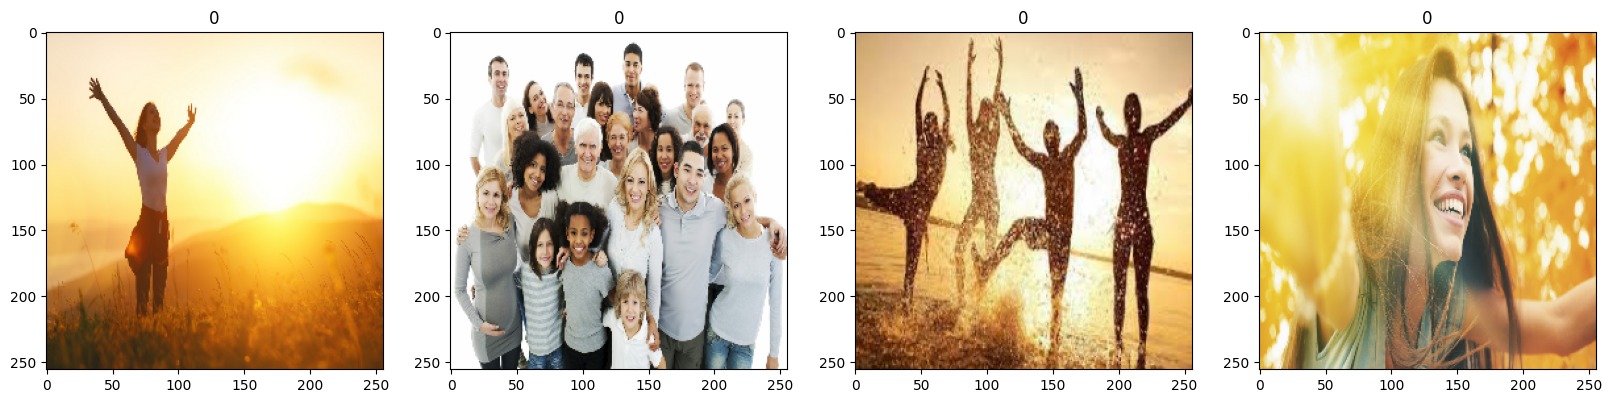

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocess Data

In [19]:
scaled =data.map(lambda x,y: (x/255,y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[0].max()

255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.90625].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0703125..251.6875].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


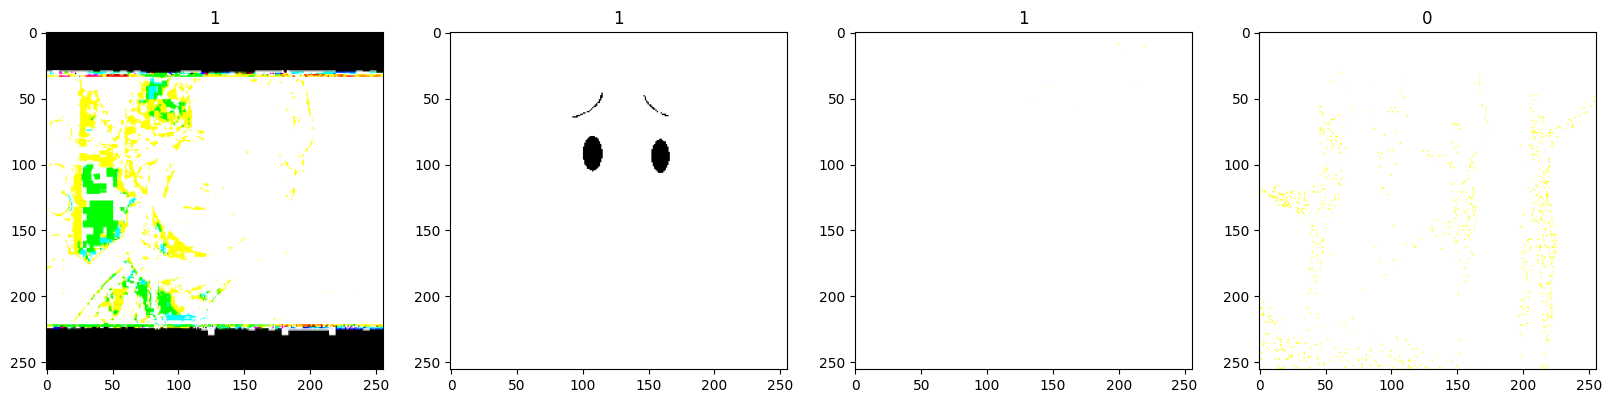

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### split Data

In [24]:
len(data)

6

In [25]:
train_size = int (len (data)*.6)
val_size = int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [26]:
train_size+val_size+test_size

6

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
len(train)

3

In [29]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

model = Sequential([Conv2d])

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics =['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [34]:
logdir ='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=20, validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 15s 4s/step - loss: 663.6653 - accuracy: 0.4896 - val_loss: 393.1867 - val_accuracy: 0.5781
Epoch 2/20
3/3 [==============================] - 11s 4s/step - loss: 176.8389 - accuracy: 0.5729 - val_loss: 80.6480 - val_accuracy: 0.3438
Epoch 3/20
3/3 [==============================] - 12s 3s/step - loss: 42.3670 - accuracy: 0.3854 - val_loss: 1.2967 - val_accuracy: 0.7344
Epoch 4/20
3/3 [==============================] - 12s 3s/step - loss: 0.8055 - accuracy: 0.7812 - val_loss: 0.6567 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 11s 3s/step - loss: 0.5531 - accuracy: 0.6667 - val_loss: 0.6665 - val_accuracy: 0.6875
Epoch 6/20
3/3 [==============================] - 9s 3s/step - loss: 0.4896 - accuracy: 0.7083 - val_loss: 0.4690 - val_accuracy: 0.7812
Epoch 7/20
3/3 [==============================] - 9s 3s/step - loss: 0.3712 - accuracy: 0.8229 - val_loss: 0.4577 - val_accuracy: 0.7500
Epoch 8/20
3/3 [============

### Train

In [40]:
logdir='logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

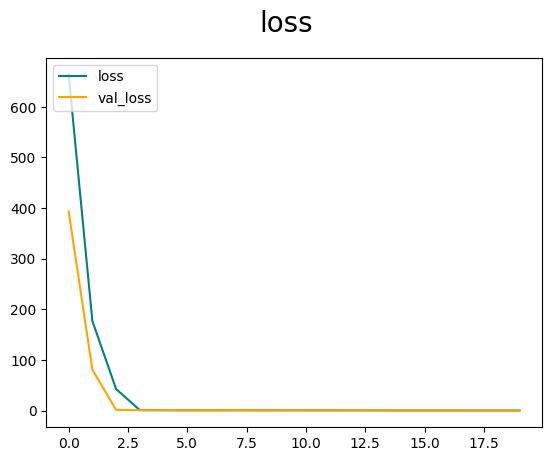

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange', label = 'val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

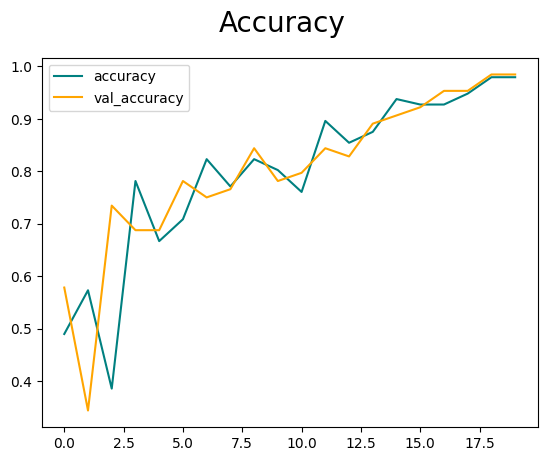

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate Performance

In [46]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy 

In [52]:
pre = Precision()
re = Recall()
acc= BinaryAccuracy()

In [53]:
len(test)

1

In [54]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 152ms/step


In [59]:
print(f'Precision :{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision :1.0,Recall:1.0,Accuracy:1.0


#### Test

In [60]:
import  cv2

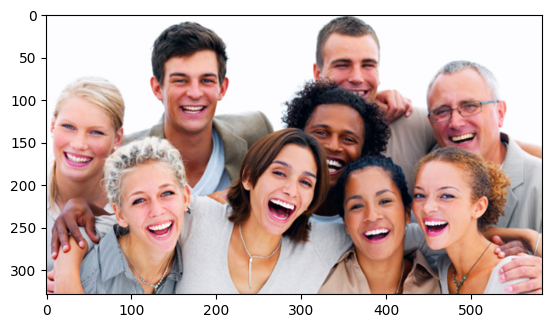

In [84]:
img = cv2.imread('very-happy-people.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

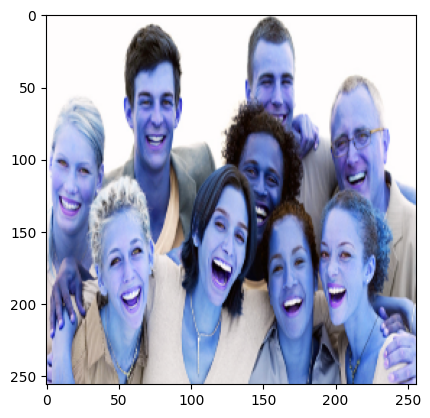

In [85]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [86]:
resize.shape

TensorShape([256, 256, 3])

In [87]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 80ms/step


In [88]:
yhat

array([[0.5083428]], dtype=float32)

In [89]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is Happy')

Predicted class is sad


### Save the Model

In [99]:
from tensorflow.keras.models import load_model

In [97]:
model.save(os.path.join('model','happysadmodel.h5'))

In [100]:
new_model = load_model(os.path.join('model','happysadmodel.h5'))

In [104]:
new_model

In [105]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 74ms/step


array([[0.5083428]], dtype=float32)

In [106]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 72ms/step


In [107]:
if yhatnew > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is Happy')

Predicted class is sad
